<h1><center>Diamond Price Prediction Using LSTM Neural Network</center></h1>




---



# 1.	Introduction

**1.1	Goal**

This notebook has the purpose of analysing and predicting diamond prices using Long Short Term Memory (LSTM) neural network. As input for the LSTM indicators like inflation rate, interest rate (10-year treasury inflation-indexed security, constant maturity, risk-free), fed rate (effective federal funds rate) and gold price are used.

**1.2	Relevance**

Diamond and graphite are the solid forms of carbon. Diamond as crystalized carbon is widely used in the industry. It can not only be created by compressing graphite, but in a purer and more reliable way via Plasma-enhanced chemical vapor deposition (PECVD). Lab-grown diamonds can be used as investment, windows for ultraviolet lasers, cutting tools or in doped form in the next generation of processors in quantum computing. Above all they are more and more used in jewellery. 
2018 was a turning point for the arise of lab-grown diamonds in the jewellery sector. Before 2018 diamond retailers were not willing to give lab-grown diamonds a chance as they considered themselves as luxury retailers. In May 2018 Lightbox, De Beers’ lab-grown diamond subsidiary, made its debut at JCK Las Vegas (Americas most comprehensive jewellery gathering), just as retail jewellery gatekeepers indicated they were finally open for lab-grown diamonds. Since then, lab-grown diamonds are a fundamental threat to the natural diamond industry. They are not just a competitive product like gems, pearls, or gold jewellery. They are a replacement product. Questions about lab-grown diamond prices and how they are changing are consuming supporters and critics of the lab-grown diamonds in the jewellery sector.

**1.3	Research Question**

How will prices of natural and lab-grown diamonds develop in the future?

**1.4	Current State of Research – Price Prediction**

When it comes to price prediction machine learning has been successful in predicting stock market prices through a host of different time series models. There is also a limited but quite restrictive application in predicting cryptocurrency prices. However, there is no application found so far for diamond price prediction. The reason behind this is obvious as diamond prices depend on a lot of factors like technological progress, operational disruptions, economic problems, political factors etc. 

**1.5	Current State of Research – LSTM**

We use sequential data as base for our price prediction. For sequential data Recurrent neural networks (RNN) are state of the art. The algorithm remembers its input due to its internal memory, which makes it perfectly applicable for solving machine learning problems involving sequential data. LSTM are an extension of recurrent neural networks. They basically extend the memory so that they can remember inputs over a longer period of time. Moreover, LSTM can remember important information and forget irrelevant information at the same time. Most important LSTMs offer a number of benefits when it comes to multi-step time series forecasting:
*     Native Support for Sequences: LSTMs are a type of RNN, and as such are designed to take sequence data as input, unlike other models where lag observations must be presented as input features.
*     Multivariate Inputs: LSTMs directly support multiple parallel input sequences for multivariate inputs, unlike other models where multivariate inputs are presented in a flat structure.
*     Vector Output: Like other neural networks, LSTMs are able to map input data directly to an output vector that may represent multiple output time steps.

**1.6	Knowledge Gap**

Several code examples for LSTM modelling publicized on data science blogs are wrong because they don’t use the output of LSTM as input for the next prediction. So, they are only replicating the input and lead to wrong results. To avoid that problem in this notebook a “Multi-Step LSTM Time Series Forecasting Model” is used.


# 2.	Procedure

The leading industry methodology for a data mining resp. data analysing process model is the so-called CRISP-DM. It consists of the following six major interconnected phases: 

(1) business understanding

(2) data understanding

(3) data preparation 

(4) modelling

(5) evaluation

(6) deployment



**2.1 Business Understanding**

* Diamonds are traditionally classified into three different market segments: industrial, jewellery and investment. In this paper the jewellery segment is observed. According to Paul Zimnisky, a leading global diamond industry analyst, the global synthetic gem diamond production will rise from 1 million carat in 2015 to 6 million carats in 2025. 
* The question is how diamond prices (for natural and lab grown diamonds) in this segment will develop in the future. This question is not an easy one to answer as diamond prices are influenced by many factors like trade barriers, political instability, operational disruptions like mine closures or economic downturns resp. upturns. 
* Moreover, natural and lab grown prices are not strictly bound together by a certain ratio. Nevertheless, we can see that lab-grown prices are somehow attached to prices for natural diamonds. This is because diamantaires are bringing their habits from the natural business to the lab-grown business. Lab-growns started at a percentage of about 65% of natural diamonds in 2017. Advances in technology, consolidation and production capacity growth in China are causing unit costs and prices of lab-grown diamonds to drop in 2019 and 2020. In 2020 the percentage for lab-growns was already about 35% of naturals as shown in the following figure:

* Thus, the ratio between natural and lab-grown prices is changing over time. So, what we can do is predicting the natural prices in the first step and calculate lab-grown prices in the next step (as lab-grown prices are somehow attached to natural ones as already mentioned) with the following assumptions:
  * The simplest assumption is to assume that the percentage for lab-growns stays at 35% of the natural ones (conservative scenario). 
  * If the actual downward trend of lab-grown prices continues, lab-grown diamonds could expand into the wider mass jewellery segment (major fashion jewellery retailers are already adding lab-grown diamonds to their product offerings), targeting a different audience than natural diamonds. Ronnie VanderLinden, owner of New York-based wholesaler Diamex Inc., doesn’t expect the price of lab-grown diamonds to fall any further than current Lightbox rates. He assumes that 800 USD a carat is the bottom as there are still the fixed costs of labour and polishing, plus growth, and wages aren’t going back down either. Based on this assumption 800 USD a carat would be the minimum price (pessimistic scenario).
  * Alternatively, if the trend of product differentiation reverses, we could see more lab-grown diamonds in the premium jewellery segment, compensating for the decreased supply of natural diamonds. In this scenario lab-grown prices could be on a 2017/18 level (optimistic scenario).
* As we predict only a few days into the future, the first scenario (conservative scenario) is the scenario we consider.
* So, we start by predicting the price development of natural diamonds (and calculate the price development of lab-grown diamonds based on these prices). To predict prices, indicators are needed. Empirical findings support the argument that diamond prices in the jewellery segment respond to economic downturns resp. upturns and are therefore also correlated with disposable income. Disposable income in turn has been found to be correlated with inflation rates and interest rates. As historical data on a daily base is available for inflation rates and interest rates (but not for disposable income) these rates are taken into consideration. 
* Because the US are playing a big role in the diamond business, the following US rates are considered:
 * **inflation rate** (10-year breakeven inflation rate)
 * **interest rate** (10-year treasury inflation-indexed security, constant maturity, risk-free) 
 * **fed rate** (effective federal funds rate)
* Furthermore, **gold prices** are taken into consideration as they could be an indicator for diamond prices in the jewellery segment as well.


**2.2 Data Understanding**

* Before modelling the neural network to predict prices in the future, we look at the historical development of diamond prices as well as the considered indicators. 

* To analyse the data, we first need to import the required libraries (like Keras, Scikit-learn, Pandas, Numpy, Matplotlib, Seaborn, Math and Datetime).

In [1]:
# import libraries
from keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from numpy import split
from numpy import array
from numpy import isnan
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt
from datetime import timedelta
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

* Real time prices in the diamond market are reflected by the so-called **Diamond Financial Index (DFX)** which is available on a daily base since 26th April 2018. Datasets for other variables (inflation rate, interest rate, fed rate, gold price) are also downloaded starting with this date. End date is 04th June 2021. This results in five datasets with 1.134 rows each. Columns which are not needed are dropped (volume, change % etc.).

* The five datasets have been downloaded from the following websites and merged to one dataset:

    * diamond price (DFX): https://www.investing.com/indices/get-diamonds-general
    * inflation rate: https://fred.stlouisfed.org/series/T10YIE
    * interest rate: https://fred.stlouisfed.org/series/DFII10
    * fed rate: https://fred.stlouisfed.org/series/DFF
    * gold price: https://www.boerse-online.de/rohstoffe/historisch/goldpreis/usd/


* To merge the datasets, date has been used as index. A few missing values in the datasets have been filled in by copying the value from the day before. The merged dataset has been saved as csv file.

* So we load the csv file in the next step:

In [4]:
hist = pd.read_csv("diamond_data_merged_with_other_variables.csv")

* Now we look at the historical development of diamond prices as well as the considered indicators. For the diamond prices we can see the following price development since April 2018:

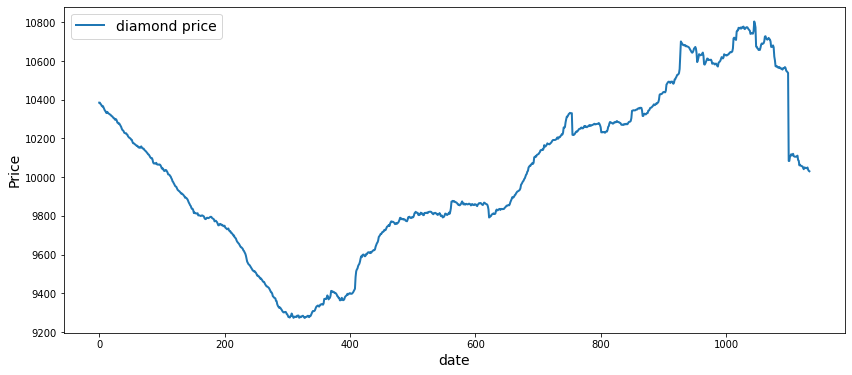

In [5]:
# plot diamond price development
def line_plot(line1, label1=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(14, 6))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.set_xlabel('date', fontsize=14)
    ax.set_ylabel('Price', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.legend(loc='best', fontsize=14)
line_plot(hist["diamond price"], "diamond price", title='')
#line_plot(hist["gold price"], "gold price", title='')

After a robust performance in 2018, we see a challenging year for the diamond industry in 2019 (due to rising trade barriers and political instability) followed by a difficult first half of 2020 (due to the Covid-19 pandemic) and recovery in the second half of 2020 and the beginning of 2021.

Gold prices on the contrary are showing a positive trend since 2018:

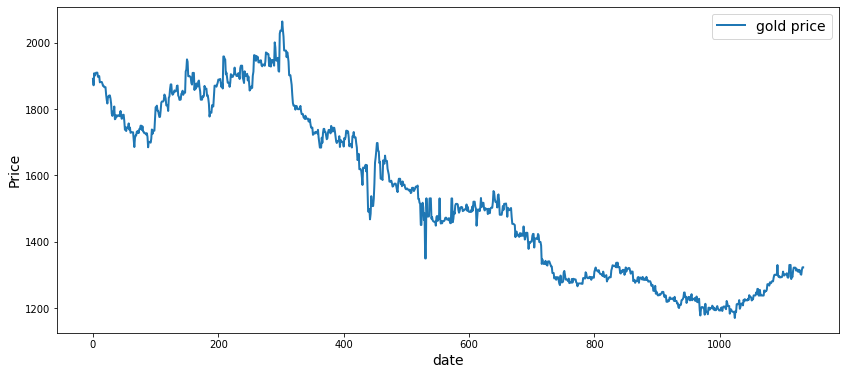

In [6]:
# plot gold price development
def line_plot(line1, label1=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(14, 6))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.set_xlabel('date', fontsize=14)
    ax.set_ylabel('Price', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.legend(loc='best', fontsize=14)
#line_plot(hist["diamond price"], "diamond price", title='')
line_plot(hist["gold price"], "gold price", title='')

A look at inflation rates hypothesizes a strong relation with diamond prices:

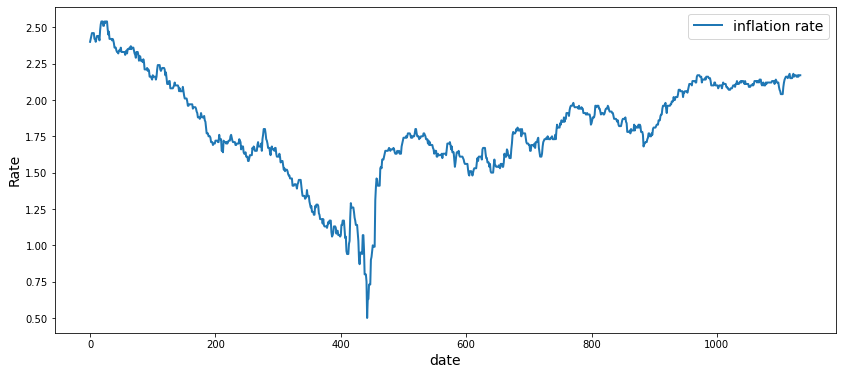

In [7]:
# plot inflation rate development
def line_plot(line1, label1=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(14, 6))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.set_xlabel('date', fontsize=14)
    ax.set_ylabel('Rate', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
line_plot(hist["inflation rate"], "inflation rate", title='')

Fed rate (effective federal funds rate) and risk-free interest rate (10-year treasury inflation-indexed security, constant maturity) are showing a downward trend since 2018:

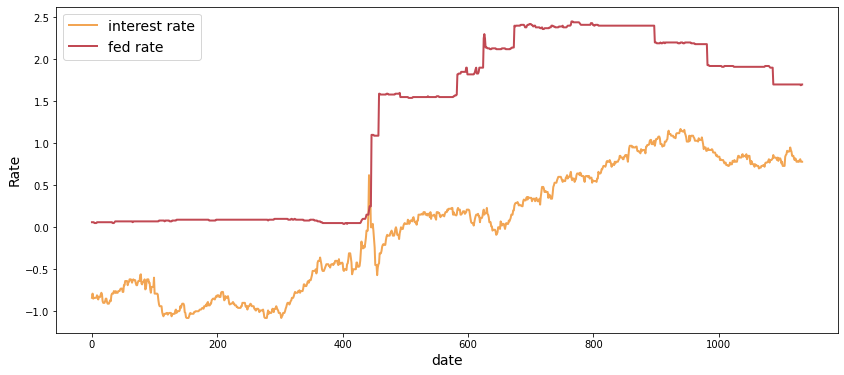

In [8]:
# plot fed rate and interest rate development
def line_plot(line2, line3, label2=None, label3=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(14, 6))
    ax.plot(line2, label=label2, linewidth=lw, color='#f2a553')
    ax.plot(line3, label=label3, linewidth=lw, color="#c14953")
    ax.set_xlabel('date', fontsize=14)
    ax.set_ylabel('Rate', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.legend(loc='best', fontsize=14)
line_plot(hist["interest rate"], hist["fed rate"], "interest rate", "fed rate", title='')


Next, we will take a look on the correlation between the diamond price (our target variable) and our indicators (our input variables). The following heatmap will show the correlations:

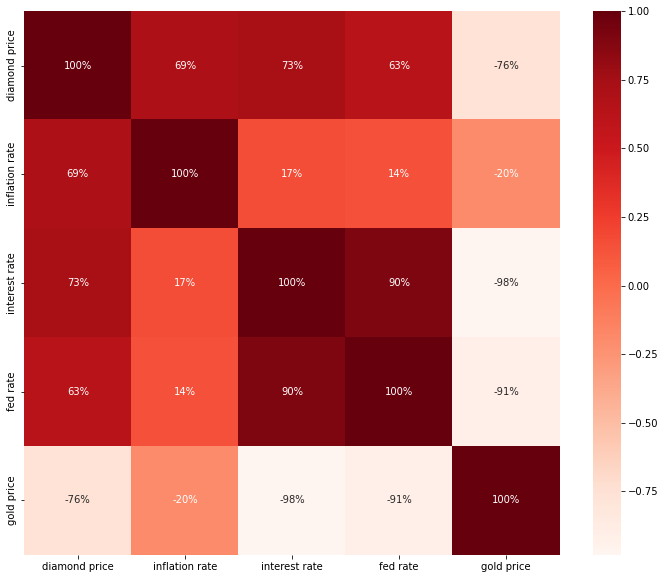

In [9]:
# Heat map
ax = plt.figure(figsize=(12,10))
sns.heatmap(hist.corr(),annot=True,cmap="Reds", fmt='.0%')
plt.show()

We can see a strong correlation between the diamond price, and all considered input variables. Inflation rate, interest rate and fed rate are positively correlated whereas the gold price is negatively correlated with the diamond price. This means that the chosen input variables are probably good indicators to predict diamond prices in the future.

**2.3 Data Preparation** (done before, therefore not part of this notebook)

* Data merge:
Five single datasets had to be merged to one dataset. Therefore, date has been used as index. For this purpose the “.set_index” and “pd.to_datetime” functions have been used. Then datasets have been merged with the “.merge” function.

* Fill in missing values:
There were a few missing values in the datasets. A very simple approach to fill in missing values is to copy the value from the day before. We implemented this in a function named “fill_missing()” that will take the Numpy array of the data and copy values from one day ago.

**2.4 Modelling**

* As mentioned before a “Multi-Step LSTM Time Series Forecasting Model” is used to predict future diamond prices. At this point I want to pay tribute to an amazing inspiration:

<div class="alert alert-block alert-info"> 
    
The programming code from Jason Brownlee for power usage was adapted to price prediction for this project (https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/).
Thanks for inspiring me and letting me learn from your work!
    
</div>

* First of all, the dataset is divided by the ratio of approximately 70/30 into a training and a test data set. This means 806 rows of data are used for training the predictive model and 328 rows for evaluating the model.
* The model contains a single hidden LSTM layer with 200 units. The number of units in the hidden layer is not related to the number of time steps in the input sequences. The LSTM layer is followed by a completely connected layer with 200 nodes that will interpret the features learned by the LSTM layer. As we want to predict seven days, an output layer will directly predict a vector with seven elements, one for each day in the output sequence.
* The prices are in USD and it would be useful to have an error metric in the same units. Both Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) fit this bill, although RMSE is more commonly used and will therefore be adopted here. 
* As loss function the mean squared error loss function is used as it is a good match for the chosen error metric of RMSE. 
* For optimization the efficient Adam (Adaptive Moment Estimation) implementation of stochastic gradient descent is used and the model is fitted for 50 epochs with a batch size of 16. The small batch size and the stochastic nature of the algorithm means that the model will learn a slightly different mapping of inputs to outputs each time it is trained. This means results can vary when the model is evaluated. 
* As activation function "rectified linear unit activation function" (ReLU) is used. This function allows a fast-learning process.
* The argument “n_input” is used to define the number of prior observations that the model will use as input in order to make a prediction. n_input is 15 days here, which means that 15 days are used is input to make a prediction. 

In [11]:
# multivariate multi-step encoder-decoder lstm

# split a univariate dataset into train/test sets
def split_dataset(hist):
 	# split into standard weeks
 	train, test = hist[1:-328], hist[-328:-6]
 	# restructure into windows of weekly data
 	train = array(split(train, len(train)/7))
 	test = array(split(test, len(test)/7))
 	return train, test

#%%
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores
 
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))
    
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)
 
# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 1, 50, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model
 
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=1)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat
 
# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores, predictions
    

#%%
# load the new file
hist = pd.read_csv('diamond_data_merged_with_other_variables.csv', header = 0) 
hist.info()  
# date as index
hist["date"] = pd.to_datetime(hist["date"])
hist = hist.set_index('date')
hist.info() 
# split into train and test
train, test = split_dataset(hist.values)

#%%
# evaluate model and get scores
n_input = 15
score, scores, predictions = evaluate_model(train, test, n_input)

# summarize scores RMSE
summarize_scores('lstm RMSE', score, scores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1134 non-null   object 
 1   diamond price   1134 non-null   float64
 2   inflation rate  1134 non-null   float64
 3   interest rate   1134 non-null   float64
 4   fed rate        1134 non-null   float64
 5   gold price      1134 non-null   float64
dtypes: float64(5), object(1)
memory usage: 53.3+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2021-06-04 to 2018-04-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diamond price   1134 non-null   float64
 1   inflation rate  1134 non-null   float64
 2   interest rate   1134 non-null   float64
 3   fed rate        1134 non-null   float64
 4   gold price      1134 non-null   float64
dtypes: float64(5)
memory usage: 53.2 KB
E

* After training the model price predictions for natural diamonds are calculated for the next seven days:

In [12]:
# predictions
pre = predictions.mean(axis=0)
print(pre)

[[10418.085]
 [10440.95 ]
 [10454.17 ]
 [10444.526]
 [10452.888]
 [10435.327]
 [10455.912]]


In the next step we plot the predictions:

In [13]:
df = pd.read_csv("df_diamond_data_merged_with_other_variables.csv")

date_actual = df["date"].iloc[0]

date_future = []
for i in range (1,8):
    date_future.append(date_actual + str(timedelta(i)))

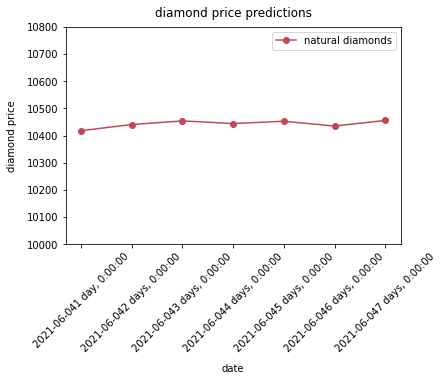

In [14]:
# plot predictions (05.06.2021 - 11.06.2021)
plt.plot(date_future, pre.tolist(), color = "#c14953", marker='o', label='natural diamonds')
plt.title('diamond price predictions', pad = 10)
plt.xlabel('date', labelpad = 10)
plt.ylabel('diamond price', labelpad = 10)
plt.axis(ymin=10000, ymax=10800)
plt.xticks(rotation=45)
plt.legend(loc="best")
pyplot.show()

* Looking-up the actual diamond prices for the predicted seven days on investing.com and plotting them against the predicted values results in the following figure:

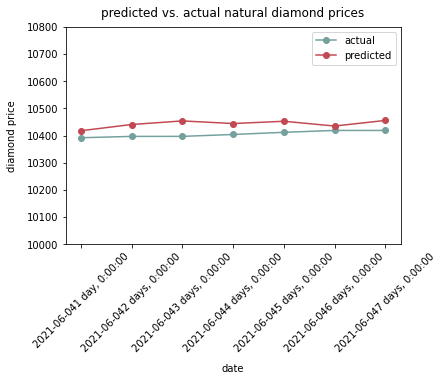

In [15]:
# plot predictions vs. actual future prices (05.06.2021 - 11.06.2021)
act = [10392.26, 10397.22, 10397.28, 10404.28, 10412.21, 10419.12, 10419.12]
plt.plot(date_future, act, color = "#74a09e", marker='o', label='actual')
plt.plot(date_future, pre.tolist(), color = "#c14953", marker='o', label='predicted')
plt.title('predicted vs. actual natural diamond prices', pad = 10)
plt.xlabel('date', labelpad = 10)
plt.ylabel('diamond price', labelpad = 10)
plt.axis(ymin=10000, ymax=10800)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
pyplot.show()

* Based on the price prediction for natural diamonds the prices for lab-grown diamonds are calculated by multiplying the natural prices with 0,35 (ratio between natural and lab-grown prices):

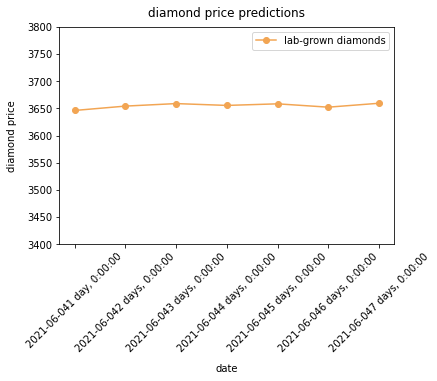

In [16]:
# prediction for lab-grown diamonds (lg = lab-grown) - conservative scenario

# create conservative list
list_conservative = []
for i in pre:
    list_conservative.append(i * 0.35)
    
lg_conservative = np.asarray(list_conservative)

# plot predictions natural vs. lab-grown (05.06.2021 - 11.06.2021)
# plt.plot(date_future, pre.tolist(), color = "#c14953", marker='o', label='natural diamonds')
plt.plot(date_future, lg_conservative, color = "#f2a553", marker='o', 
         label='lab-grown diamonds')
plt.title('diamond price predictions', pad = 10)
plt.xlabel('date', labelpad = 10)
plt.ylabel('diamond price', labelpad = 10)
plt.axis(ymin=3400, ymax=3800)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
pyplot.show()

* Please note that in this figure a different y-axis scale is used than in the figures above.

**2.5 Evaluation**

* So, when is a model considered skillful? A model is considered skillful if it achieves a performance better than a naive model resp. even better than linear models. What we do here is to compare the overall score of the LSTM with the overall score of a linear regression model.
* So we first calculate the RMSE of the linear model:

In [17]:
# Linear Regression
     
X = hist[["inflation rate", "interest rate", "fed rate", "gold price"]]
y = hist["diamond price"]    

X_train = X[7:]
X_test = X[:7]
y_train = y[7:]
y_test = y[:7]

# Create Classifier
clf = LinearRegression()

# Train the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)


# RMSE linear regression (last week)
RMSE_linear = mean_squared_error(y_test, y_pred, squared=False) # False = RMSE
print("RMSE linear regression: ", RMSE_linear)

[10020.74540134 10060.61860091 10024.83957034 10047.67290975
 10041.62877121 10036.99059618 10036.99059618]
RMSE linear regression:  337.02747335124684


* Then we calculate the RMSE of the LSTM model:

In [18]:
# RMSE LSTM

# RMSE LSTM - last week
summarize_scores('RMSE LSTM (last week)', score, scores)

# RMSE LSTM - future week
RMSE_lstm_future = mean_squared_error(act, pre, squared=False) # False = RMSE
print("RMSE lstm (future week): ", RMSE_lstm_future)

RMSE LSTM (last week): [130.926] 133.3, 127.1, 125.9, 134.9, 130.1, 138.1, 126.6
RMSE lstm (future week):  39.10881840802128


* The overall RMSE for the LSTM across a forecast of the last seven days is 137. 
* So we compare the overall score of 137 with the overall score of the linear regression model. 
* The overall RMSE of the linear regression model predicting the last seven days is 337. 
* Therefor the overall RMSE of the LSTM neural network is much lower and for this reason more skillful than a linear model.

**2.6 Deployment**

* As already mentioned above diamond prices depend on a lot of factors like technological progress, operational disruptions, economic problems, political factors etc. Therefore, it’s surely not possible to do a long-term prediction. The purpose of this paper was to look only to the near future and predict prices for the next seven days. The model can be used with sequential data to forecast other prices like stock market prices or cryptocurrency prices.

# 3.	Outlook

* Data has not been normalized before fed into the neural network. Maybe the performance of the LSTM model can be improved by using Min Max Scaler to normalize data. 
* Moreover, the structure and hyperparameters for the LSTM model can be tuned to further lift the model performance on average. Diagnostics such as learning curves for the train and validation loss and mean squared error may help to tune the structure and hyperparameters of the model.
* Further interesting questions would be to find out
    * if there is any impact from tweets of certain key players in the diamond jewellery industry (like De Beers, Harry Winston, Tiffany, Cartier etc.) on the fluctuation of the diamond prices.
    * if there is any correlation between customer sentiment and the development of the diamond prices. 
* If any correlation between customer sentiment and diamond prices could be found and if customer sentiment can be measured with a certain frequency (at best daily), customer sentiment could be used as an input variable for the LSTM model.